In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Timestamp

In [33]:
uri = "https://raw.githubusercontent.com/PatapongPanpiboon/density_prediction/main/Datasets-hourly.csv"
df=pd.read_csv(uri)
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.shape

(40128, 10)

In [42]:
df.head()

,SymH,Density,SymH_Norm,Density_Norm,ap60,F107,MgII,ap60_Norm,F107_Norm,MgII_Norm
Date,,,,,,,,,,
2018-05-29 00:00:00,13,1.990000e-14,0.153527,0.010414,4,77.0,0.274551,0.019324,0.418478,0.973516
2018-05-29 01:00:00,17,1.990000e-14,0.136929,0.010414,3,77.0,0.274551,0.014493,0.418478,0.973516
2018-05-29 02:00:00,20,8.720000e-14,0.124481,0.049660,6,77.0,0.274551,0.028986,0.418478,0.973516
2018-05-29 03:00:00,20,8.500000e-14,0.124481,0.048422,7,77.0,0.274551,0.033816,0.418478,0.973516
2018-05-29 04:00:00,12,1.870000e-14,0.157676,0.009739,9,77.0,0.274551,0.043478,0.418478,0.973516


In [43]:
df1_c = df.loc['2018-05-29':'2020-09-15']
df2_c = df.loc['2020-09-16':'2022-12-25']
print(df1_c.shape,df2_c.shape)

(20184, 10) (19944, 10)


In [44]:
!pip install emd
import emd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.4 MB/s eta 0:00:00


In [45]:
arrDNS_minimum = df1_c['Density_Norm'].to_numpy()
imf_DNS_minimum = emd.sift.sift(arrDNS_minimum)

print(imf_DNS_minimum.shape)

(20184, 11)


In [46]:
arrDNS_rising = df2_c['Density_Norm'].to_numpy()
imf_DNS_rising = emd.sift.sift(arrDNS_rising)

print(imf_DNS_rising.shape)

(19944, 9)


In [47]:
colms_imf_DNS_minimum = ['imf_DNS_1','imf_DNS_2','imf_DNS_3','imf_DNS_4',
              'imf_DNS_5','imf_DNS_6','imf_DNS_7','imf_DNS_8',
              'imf_DNS_9','imf_DNS_10','imf_DNS_11']
df_imf_DNS_minimum = pd.DataFrame(imf_DNS_minimum, columns=colms_imf_DNS_minimum)
df_imf_DNS_minimum.head(2)

,imf_DNS_1,imf_DNS_2,imf_DNS_3,imf_DNS_4,imf_DNS_5,imf_DNS_6,imf_DNS_7,imf_DNS_8,imf_DNS_9,imf_DNS_10,imf_DNS_11
0,-0.021837,0.006825,-0.003158,0.030653,-0.112880,0.028872,0.025390,0.007903,0.010289,0.004588,0.033769
1,-0.016980,-0.000863,-0.000657,0.030686,-0.113047,0.029125,0.025587,0.007917,0.010289,0.004588,0.033769


In [48]:
colms_imf_DNS_rising = ['imf_DNS_1','imf_DNS_2','imf_DNS_3','imf_DNS_4',
              'imf_DNS_5','imf_DNS_6','imf_DNS_7','imf_DNS_8',
              'imf_DNS_9']
df_imf_DNS_rising = pd.DataFrame(imf_DNS_rising, columns=colms_imf_DNS_rising)
df_imf_DNS_rising.head(2)

,imf_DNS_1,imf_DNS_2,imf_DNS_3,imf_DNS_4,imf_DNS_5,imf_DNS_6,imf_DNS_7,imf_DNS_8,imf_DNS_9
0,-0.000340,0.000544,-0.000114,0.004535,-0.000079,0.002803,-0.011593,-0.014590,0.038938
1,0.003408,-0.000693,0.000152,0.004771,-0.000068,0.002704,-0.011525,-0.014575,0.038941


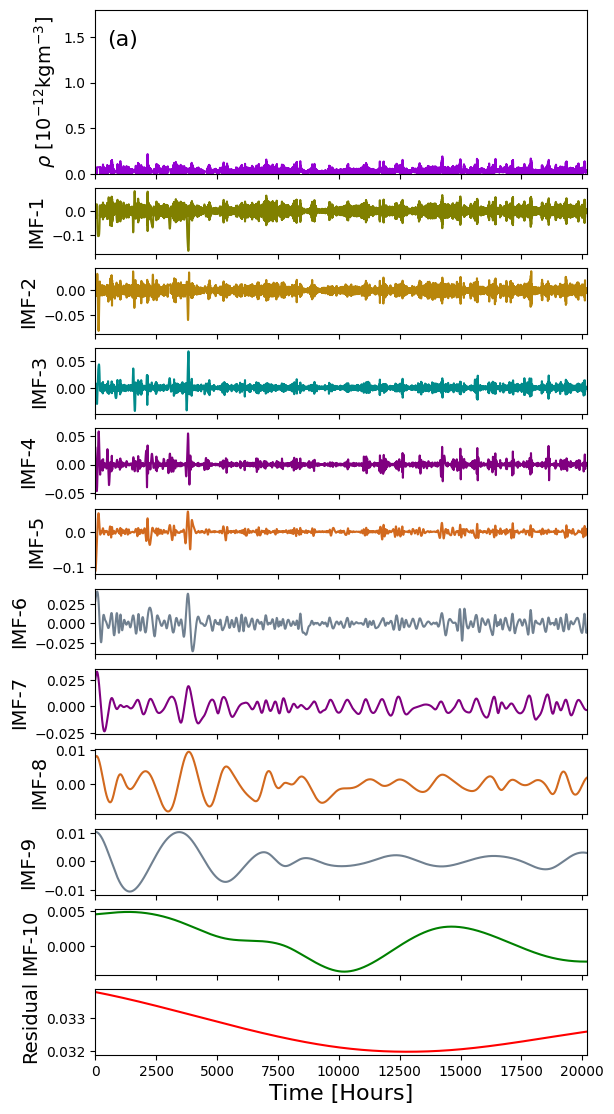

In [52]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11, ax12) = plt.subplots(12, 1, figsize = (6, 11)
            ,sharex=True, gridspec_kw={'height_ratios': [2.5,1,1,1,1,1,1,1,1,1,1,1]})

ax1.plot(df_imf_DNS_minimum.index, df1_c['Density_Norm'], color='darkviolet')
ax1.set_ylabel(r'$\rho$' " [$\mathregular{10^{-12} kgm^{-3}}$]", size=14)
ax1.set_ylim(0,1.8)
ax1.text(500, 1.4, '(a)', size=16,
            bbox=dict(facecolor='white', edgecolor='white'))

ax2.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_1, color='olive')
ax2.set_ylabel('IMF-1', size=14)

ax3.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_2, color='darkgoldenrod')
ax3.set_ylabel('IMF-2', size=14)

ax4.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_3, color='darkcyan')
ax4.set_ylabel('IMF-3', size=14)

ax5.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_4, color='purple')
ax5.set_ylabel('IMF-4', size=14)

ax6.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_5, color='chocolate')
ax6.set_ylabel('IMF-5', size=14)

ax7.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_6, color='slategray')
ax7.set_ylabel('IMF-6', size=14)

ax8.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_7, color='purple')
ax8.set_ylabel('IMF-7', size=14)

ax9.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_8, color='chocolate')
ax9.set_ylabel('IMF-8', size=14)

ax10.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_9, color='slategray')
ax10.set_ylabel('IMF-9', size=14)

ax11.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_10, color='green')
ax11.set_ylabel('IMF-10', size=14)

ax12.plot(df_imf_DNS_minimum.index, df_imf_DNS_minimum.imf_DNS_11, color='red')
ax12.set_ylabel('Residual', size=14)
ax12.set_xlabel("Time [Hours]", size = 16)

ax1.margins(0,)
plt.tight_layout(pad = .2)
plt.show()

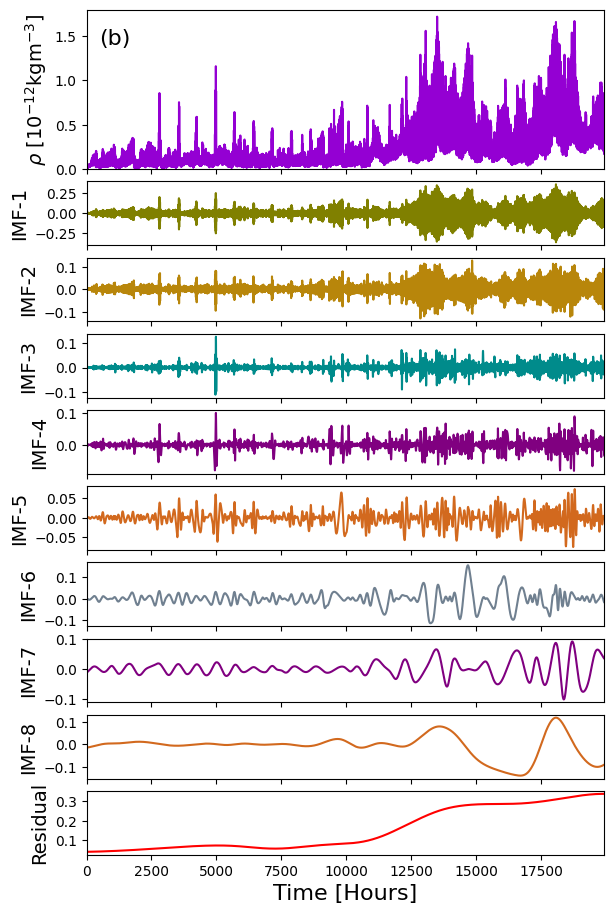

In [54]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(10, 1, figsize = (6, 9)
            ,sharex=True, gridspec_kw={'height_ratios': [2.5,1,1,1,1,1,1,1,1,1]})

ax1.plot(df_imf_DNS_rising.index, 1e12*df2_c['Density'], color='darkviolet')
ax1.set_ylabel(r'$\rho$' " [$\mathregular{10^{-12} kgm^{-3}}$]", size=14)
ax1.set_ylim(0,1.8)
ax1.text(500, 1.4, '(b)', size=16,
            bbox=dict(facecolor='white', edgecolor='white'))

ax2.plot(df_imf_DNS_rising.index, df_imf_DNS_rising.imf_DNS_1, color='olive')
ax2.set_ylabel('IMF-1', size=14)

ax3.plot(df_imf_DNS_rising.index, df_imf_DNS_rising.imf_DNS_2, color='darkgoldenrod')
ax3.set_ylabel('IMF-2', size=14)

ax4.plot(df_imf_DNS_rising.index, df_imf_DNS_rising.imf_DNS_3, color='darkcyan')
ax4.set_ylabel('IMF-3', size=14)

ax5.plot(df_imf_DNS_rising.index, df_imf_DNS_rising.imf_DNS_4, color='purple')
ax5.set_ylabel('IMF-4', size=14)

ax6.plot(df_imf_DNS_rising.index, df_imf_DNS_rising.imf_DNS_5, color='chocolate')
ax6.set_ylabel('IMF-5', size=14)

ax7.plot(df_imf_DNS_rising.index, df_imf_DNS_rising.imf_DNS_6, color='slategray')
ax7.set_ylabel('IMF-6', size=14)

ax8.plot(df_imf_DNS_rising.index, df_imf_DNS_rising.imf_DNS_7, color='purple')
ax8.set_ylabel('IMF-7', size=14)

ax9.plot(df_imf_DNS_rising.index, df_imf_DNS_rising.imf_DNS_8, color='chocolate')
ax9.set_ylabel('IMF-8', size=14)

ax10.plot(df_imf_DNS_rising.index, df_imf_DNS_rising.imf_DNS_9, color='red')
ax10.set_ylabel('Residual', size=14)
ax10.set_xlabel("Time [Hours]", size = 16)

ax1.margins(0,)
plt.tight_layout(pad = .2)
plt.show()